# Functions

In [201]:
def haversin(x):
    return math.sin(x)**2

def inverse_haversin(x):
    return math.asin(math.sqrt(x))

def great_circle_dist(a, b, c, d):
    haversin_d_over_R = haversin(b - a) + math.cos(a)*math.cos(b)*haversin(d - c)
    d_over_R = inverse_haversin(haversin_d_over_R)
    d = d_over_R * 6371
    return d

# reference
#https://undergroundmathematics.org/trigonometry-compound-angles/the-great-circle-distance

## Mutate Path

In [202]:
def mutate_path(mutation_rate, path):
    mutated_path = path.copy()
    for i in range(len(path)):
        rand_num = np.random.uniform(0, 1)
        if rand_num <= mutation_rate:
            idx = int(np.random.choice(len(mutated_path), 1))
            mutated_path[i], mutated_path[idx] = mutated_path[idx], mutated_path[i]
    return mutated_path

In [203]:
def travel_dist(path, adj_matrix):
    total_dist = 0
    for idx in range(len(path) - 1):
        total_dist += adj_matrix[path[idx], path[idx+1]]
    return total_dist

## Fitness Score

In [204]:
scale_factor = 10**7
def fitness_score(path, adj_matrix):
    return 1/(travel_dist(path, adj_matrix)) * scale_factor

In [205]:
fitness_score(population[0], adj_matrix)

16.083148090357266

## Order by Fitness Score

In [206]:
def order_by_fs(adj_matrix, population):
    fs_list = list(map(lambda x: fitness_score(x, adj_matrix), population))
    for sample, score in zip(population, fs_list):
        sample = sample.append(score)
    sorted_population = sorted(population, key = lambda x: x[-1])
    for sample in sorted_population:
        sample.pop(-1)
    return sorted_population

In [207]:
sorted_population = sorted(population, key = lambda x: fitness_score(x, adj_matrix), reverse = True)

# Roulette Method

In [208]:
total_fs = sum(map(lambda x: fitness_score(x, adj_matrix), population))
random_fs = random.uniform(0, total_fs)
for i in range(len(sorted_population)):
    random_fs -= fitness_score(population[i], adj_matrix)
    if random_fs < 0:
        print(population[i])
        break

[5, 14, 16, 6, 1, 10, 3, 19, 7, 18, 11, 8, 4, 17, 15, 13, 0, 9, 2, 12]


In [209]:
def roulette(sorted_population, adj_matrix):
    total_fs = sum(map(lambda x: fitness_score(x, adj_matrix), sorted_population))
    random_fs = random.uniform(0, total_fs)
    for i in range(len(sorted_population)):
        random_fs -= fitness_score(sorted_population[i], adj_matrix)
        if random_fs < 0:
            return population[i]

## Order Crossover

In [210]:
# Define the order-based crossover function
def order_crossover(parent1, parent2):
    # Choose a random subset of genes from the first parent
    start = np.random.randint(len(parent1))
    end = np.random.randint(start, len(parent1))
    subset = parent1[start:end+1]
    # Initialize the child with the subset
    child = [-1] * len(parent1)
    child[start:end+1] = subset
    # Fill in the remaining genes from the second parent
    j = 0
    for i in range(len(parent1)):
        if not parent2[i] in subset:
            while child[j] != -1:
                j += 1
            child[j] = parent2[i]
    return child

## Genetic Algorithm

In [211]:
def genetic_algorithm(adj_matrix, population):
    
    sorted_population = order_by_fs(adj_matrix, population)

    cross_over_perc = 0.8
    child_population = []
    for _ in range(80):
        parent1 = roulette(sorted_population, adj_matrix)
        parent2 = roulette(sorted_population, adj_matrix)

        child = order_crossover(parent1, parent2)
        child_population.append(child)

    new_population = child_population + sorted_population[:20]
    sorted_population = order_by_fs(adj_matrix, population)
    return sorted_population

## Plot Travel

In [212]:
def plot_travel(city, optimal_path):
    plt.plot(city.iloc[optimal_path,:].iloc[:,0], city.iloc[optimal_path,:].iloc[:,1])
    plt.show()

In [1]:
def make_adj_matrix(city):
    adj_matrix = pd.DataFrame(index = [i for i in range(len(city))], columns = [i for i in range(20)])
    for i in range(20):
        for j in range(20): #set range(i+1) if you want to make a lower triangle
            lat1 = math.radians(city.iloc[i, 0])
            long1 = math.radians(city.iloc[i, 1])
            lat2 = math.radians(city.iloc[j, 0])
            long2 = math.radians(city.iloc[j,1])
            adj_matrix.iloc[i, j] = great_circle_dist(lat1, lat2, long1, long2)
    return np.array(adj_matrix)

In [214]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import math

In [215]:
atlanta = pd.read_csv('./data_file/Atlanta.csv', index_col = [0])
boston = pd.read_csv('./data_file/Boston.csv', index_col = [0])
denver = pd.read_csv('./data_file/Denver.csv', index_col = [0])

In [216]:
city = atlanta

# Adjacency Matrix

In [217]:
adj_matrix = make_adj_matrix(city)

In [218]:
adj_matrix.shape

(20, 20)

# Generate Population

In [219]:
mutation_rate = 0.1
path = greedy_path
population = []
for i in range(100):
    population.append(mutate_path(mutation_rate, path))

In [220]:
greedy_path

[0, 6, 1, 2, 16, 12, 8, 11, 10, 19, 4, 17, 13, 7, 14, 18, 9, 15, 3, 5]

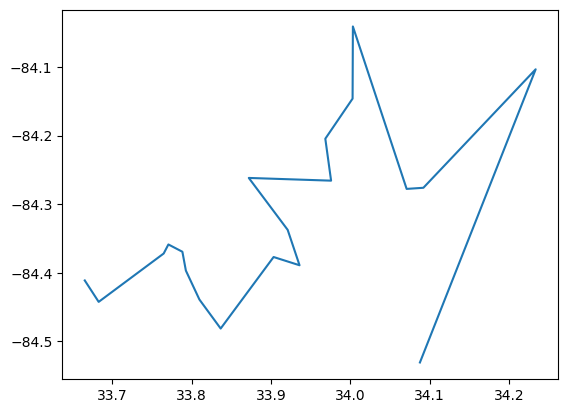

In [221]:
plot_travel(city,greedy_path)

In [ ]:
perc_completed = 0
random.seed(2023)
for _ in range(10000):
    if _ % 1000 == 0:
        perc_completed += 10
        print("{}%".format(perc_completed))
    population = genetic_algorithm(adj_matrix, population)
population[0]

10%
20%


In [ ]:
plot_travel(city, population[0])

In [ ]:
fitness_score(population[0], adj_matrix)

In [ ]:
# Define the two parent lists
parent1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
parent2 = [19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# Define the order-based crossover function
def order_crossover(parent1, parent2):
    # Choose a random subset of genes from the first parent
    start = np.random.randint(len(parent1))
    end = np.random.randint(start, len(parent1))
    subset = parent1[start:end+1]
    # Initialize the child with the subset
    child = [-1] * len(parent1)
    child[start:end+1] = subset
    # Fill in the remaining genes from the second parent
    j = 0
    for i in range(len(parent1)):
        if not parent2[i] in subset:
            while child[j] != -1:
                j += 1
            child[j] = parent2[i]
    return child

# Perform order-based crossover between the two parent lists
child = order_crossover(parent1, parent2)

# Print the results
print('Parent 1:', parent1)
print('Parent 2:', parent2)
print('Child:', child)

# Scrap Code

In [ ]:
def find_greedy_path(adj_matrix):
    visited_path = [0,]
    i = 0
    for _ in range(20):
        adj_matrix = adj_matrix.sort_values(i)
        for idx in adj_matrix.index:
            if idx not in visited_path:
                visited_path.append(idx)
                i = idx
                break
                
    return visited_path

In [ ]:
adj_matrix_df = pd.DataFrame(adj_matrix)

In [ ]:
greedy_path = find_greedy_path(adj_matrix_df)

In [ ]:
city = atlanta
adj_matrix = pd.DataFrame(make_adj_matrix(city))
greedy_path = find_greedy_path(adj_matrix)
plot_travel(city, greedy_path)

In [ ]:
adj_matrix_df = pd.DataFrame(adj_matrix)
adj_matrix_df.sort_values(0)

In [ ]:
mutation_rate = 0.1
path = [i for i in range(20)]
population = []
random.seed(1234)
for i in range(100):
    population.append(mutate_path(mutation_rate, path))

In [ ]:
plot_travel(city, greedy_path)
print(fitness_score(path, adj_matrix))

In [ ]:
plot_travel(city, path)
print(fitness_score(path, adj_matrix))

In [ ]:
perc_completed = 0
random.seed(2023)
for _ in range(10000):
    if _ % 1000 == 0:
        perc_completed += 10
        print("{}%".format(perc_completed))
    population = genetic_algorithm(adj_matrix, population)
population[0]

In [ ]:
plot_travel(city, population[0])
print(fitness_score(population[0], adj_matrix))

In [ ]:
fs_list = [fitness_score(sample, adj_matrix) for sample in population]

In [ ]:
len(fs_list)

In [ ]:
from random import sample

In [ ]:
population = []
population_size = 1000

random.seed(1234)

for _ in range(population_size):
    random_sample = random.sample([i for i in range(20)], 20)
    population.append(random_sample)
    
perc_completed = 0
    
for _ in range(10000):
    if _ % 1000 == 0:
        perc_completed += 10
        print("{}%".format(perc_completed))
    population = genetic_algorithm(adj_matrix, population)
population[0]

In [ ]:
plot_travel(city, population[0])
print(fitness_score(population[0],adj_matrix))